In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

In [41]:
df = pd.read_csv("C:/Users/Arunima/Downloads/Banking_churn_prediction.csv")

In [42]:
df.head(5)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [44]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2091.144105,48.208336,0.347236,796.109576,2.225530,925.975019,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,272.676775,17.807163,0.997661,432.872102,0.660443,937.799129,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1958.000000,36.000000,0.000000,409.000000,2.000000,176.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2154.000000,46.000000,0.000000,834.000000,2.000000,572.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,2476.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [45]:
df.shape

(28382, 21)

In [46]:
df.sum().isnull()

customer_id                       False
vintage                           False
age                               False
dependents                        False
city                              False
customer_nw_category              False
branch_code                       False
current_balance                   False
previous_month_end_balance        False
average_monthly_balance_prevQ     False
average_monthly_balance_prevQ2    False
current_month_credit              False
previous_month_credit             False
current_month_debit               False
previous_month_debit              False
current_month_balance             False
previous_month_balance            False
churn                             False
last_transaction                  False
dtype: bool

In [47]:
df['churn' ] = df['churn'].astype('category')
df['branch_code'] = df['branch_code'].astype('category')
df['customer_nw_category'] = df['customer_nw_category'].astype('category')



In [49]:

df['dependents'] = df['dependents'].astype('Int64')
df['city'] = df['city'].astype('category')

# typecasting "gender" and "occupation" to category type
df['gender'] = df['gender'].astype('category')
df['occupation'] = df['occupation'].astype('category')

In [51]:
date = pd.DatetimeIndex(df['last_transaction'])

In [52]:

# Removing the original datetime column



#dropping customer_id
data = data.drop(columns=['customer_id'])

#checking
data.dtypes

NameError: name 'data' is not defined

In [53]:
df['doy_ls_tran'] = date.dayofyear

In [54]:
df['woy_ls_tran'] = date.weekofyear

In [55]:
df['moy_ls_tran'] = date.month

In [56]:
df['dow_ls_tran'] = date.dayofweek

In [59]:
df2 = df.drop(columns = ['last_transaction'])





In [63]:

df2 = df.drop(columns=['customer_id'])

In [62]:
df2.dtypes

vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran

In [84]:
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [85]:
numerical = df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [86]:
correlation = numerical.dropna().corr()
correlation

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
customer_id,1.000000,-0.011288,0.001397,-0.009737,0.014989,0.012414,0.011372,0.008060,0.004223,-0.004819,0.004870,-0.005906,0.012085,0.011025,-0.006114,-0.006114,-0.005374,0.009665
vintage,-0.011288,1.000000,0.003170,0.005109,-0.007223,-0.008001,-0.010858,-0.003824,-0.004821,-0.000410,-0.004899,-0.007777,-0.008703,-0.010439,-0.000680,-0.000680,-0.001359,-0.009683
age,0.001397,0.003170,1.000000,-0.003809,0.058925,0.062775,0.070903,0.081361,0.023921,0.027678,0.025366,0.027717,0.063120,0.067712,0.010754,0.010754,0.011970,-0.020895
dependents,-0.009737,0.005109,-0.003809,1.000000,-0.004554,-0.000826,0.000121,0.002584,0.002188,0.022772,0.006784,0.029073,-0.001859,0.000241,0.079740,0.079740,0.077978,-0.001702
current_balance,0.014989,-0.007223,0.058925,-0.004554,1.000000,0.809257,0.857204,0.584156,0.053329,0.101495,0.075149,0.151771,0.940234,0.812295,0.035242,0.035242,0.033127,-0.000315
previous_month_end_balance,0.012414,-0.008001,0.062775,-0.000826,0.809257,1.000000,0.908053,0.661439,0.051080,0.195149,0.100379,0.192376,0.910206,0.912269,0.024130,0.024130,0.023485,0.002033
average_monthly_balance_prevQ,0.011372,-0.010858,0.070903,0.000121,0.857204,0.908053,1.000000,0.731953,0.051294,0.138967,0.091491,0.187226,0.920943,0.983797,0.021103,0.021103,0.020949,0.000647
average_monthly_balance_prevQ2,0.008060,-0.003824,0.081361,0.002584,0.584156,0.661439,0.731953,1.000000,0.085542,0.127557,0.098455,0.162203,0.642531,0.701780,0.010306,0.010306,0.009123,-0.002463
current_month_credit,0.004223,-0.004821,0.023921,0.002188,0.053329,0.051080,0.051294,0.085542,1.000000,0.165102,0.941455,0.116125,0.055339,0.055020,0.031828,0.031828,0.030267,0.000752
previous_month_credit,-0.004819,-0.000410,0.027678,0.022772,0.101495,0.195149,0.138967,0.127557,0.165102,1.000000,0.160198,0.749628,0.141613,0.178147,0.070141,0.070141,0.066691,-0.006657


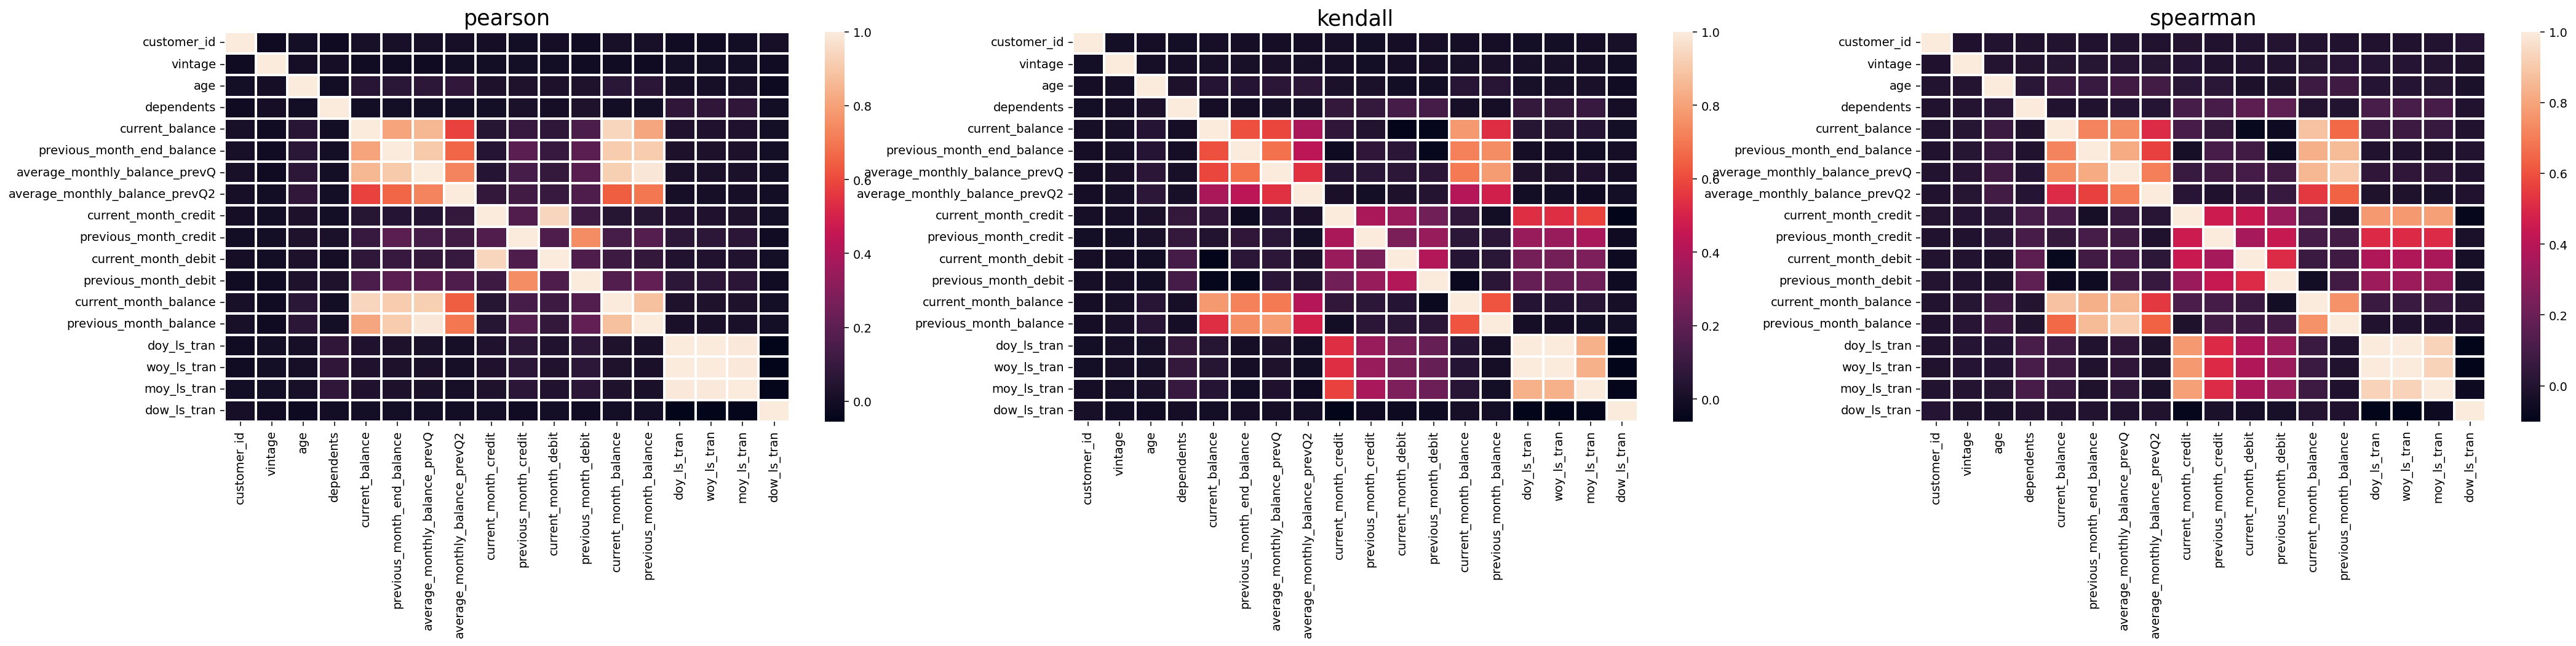

In [88]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)





In [72]:
#Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
#Too many variables with insignificant correlation.
#Major correlation lies between the transaction variables and balance variables.
#As the there are are many variables with insignificant correlation, let's filter down to the most important ones.



In [89]:
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

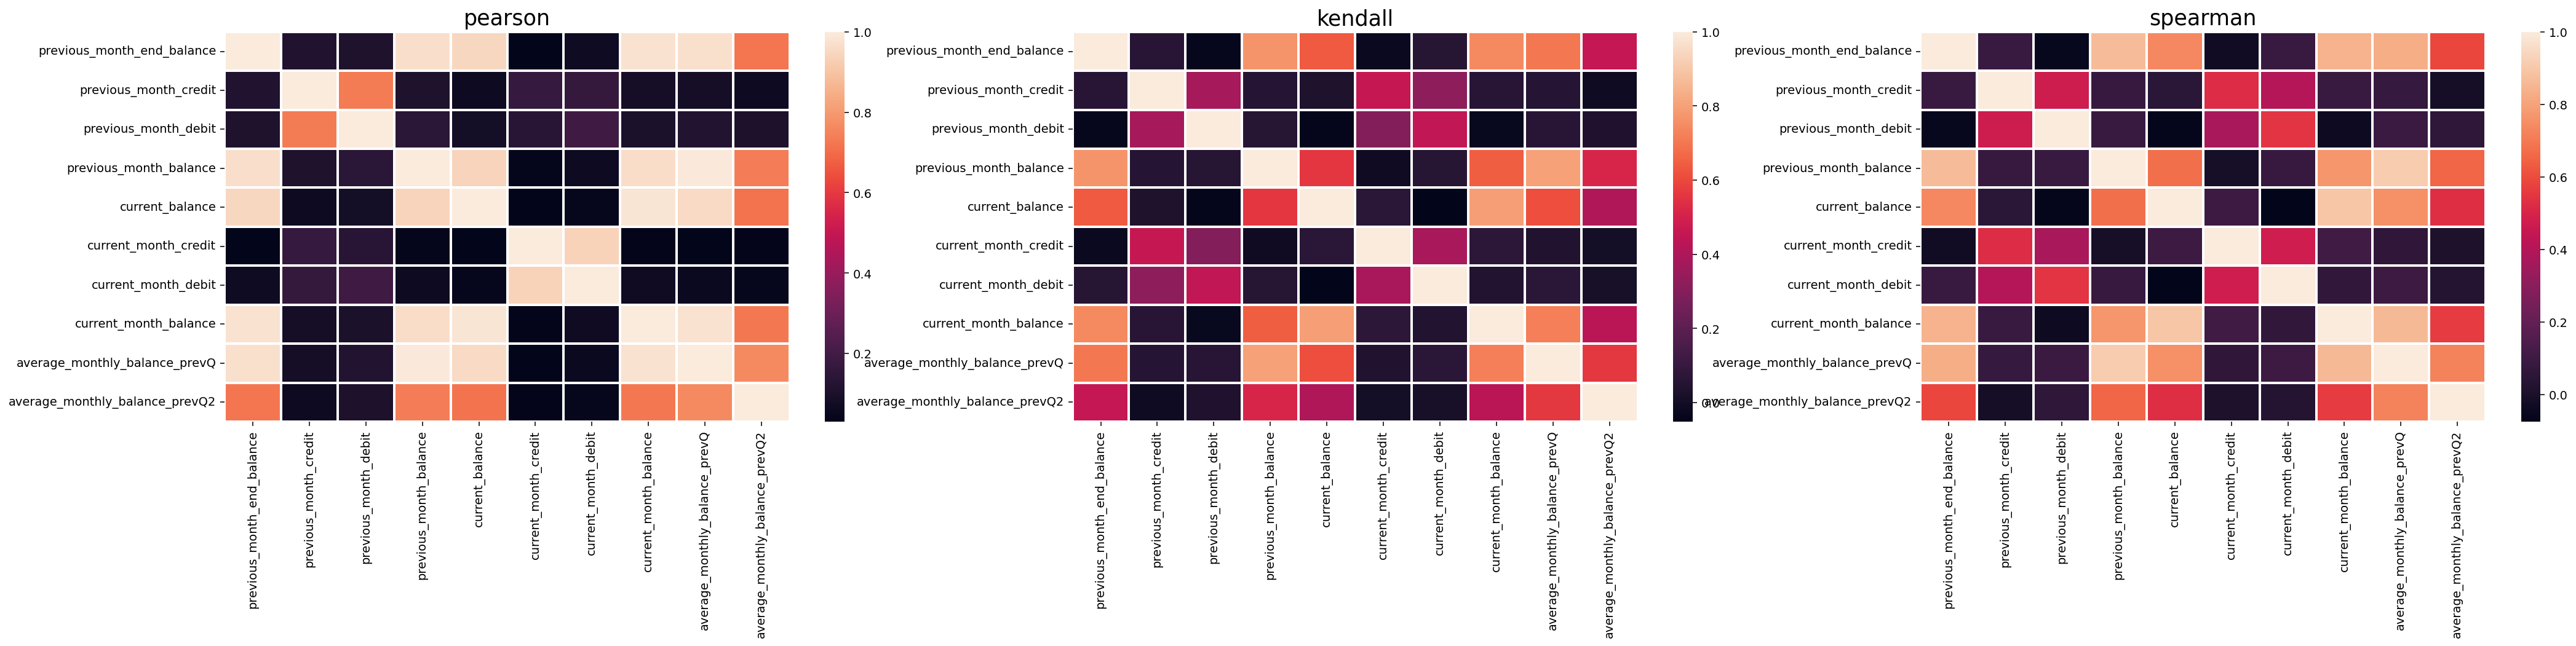

In [90]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

In [ ]:
###In this section we will be performing bivariate analysis for the Numerical Numerical combination of variables.
Although we do not have have any hypothesis which falls under this combination of variables, but we will still perform the numerical numerical bivariate analysis and relation between the independent variables can be used during the preprocessing and feature engineering.